<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Engineering-CE784A-/blob/main/Assignment2_TMD_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Q1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1b80ce01455252fb312ac516e738750eeef007f14ef9c8f64e4431fe3f495dd9_cleaned/cleaned.csv')

In [ ]:
df.head()

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus


In [ ]:
print(len(df.user.unique())) #number of unique useers
print(df.user.unique()) # userID of unique users

32
['a2d80ed662f34d32951eb1c6ed076c313e358b73'
 'a526f3566e9c9024dfa7378eb4291d787a09fd37'
 'a59868c6eb3645eedbb343ce8c336ec6f2ef2324'
 'a92dee88f61123f923dccec01eeecf1a81953b36'
 'ac4c17afeb69b39169eb301ab592696a8f353976'
 'adaaae1a67ea9e43abd60ba945eccda0cb8821e0'
 'b138d165100ef60bc793cac143742eb5aea4d6ba'
 'b45157069942d01310c3e7b74034166717bb25f9'
 'b7b165e5637b5a0226068d907748f4bbfc61a320'
 'c453226e3616ae821cdcb38f38481c2a20f2482f'
 'c5702d34b238fe68683f818e82cd3a3cd8a16366'
 'ca7950f223a8037b897d0547075dc138f9e43b20'
 'cace4ec0999436917986b4fa6e9317262c897bc2'
 'cbde60baea002b694ecf2a3ff2d95be16b00efe1'
 'ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c'
 'd429974540bfd38c3367fe9f0c8682775ff4fa18'
 'd7a1230d94f91a32cc079809748e52e8a4a6a22f'
 'd7dd12d83c81574137f858034b99f4cc83ab0718'
 'd8c047eaaee204b7b5cd71e2d67308b87b038ed3'
 'dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120'
 'dd82e3df4bebc74ed6b67877be79e29f401c16a3'
 'dde95e125d89843f7032baa734ee4d34ec775aaf'
 'de9892b879c83ea3d24fb456087

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653053 entries, 0 to 5653052
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       object 
 1   timestamp  object 
 2   x          float64
 3   y          float64
 4   z          float64
 5   class      object 
dtypes: float64(3), object(3)
memory usage: 258.8+ MB


In [ ]:
len(df['user'])


5653053

In [ ]:

# user_c=[]
# for i in range(len(df['user'])-1):
#   if (df['user'][i] != df['user'][i+1]):
#     user_c.append(1)
#   else:
#     user_c.append(0)
# user_c.append(1)
# df['user_c'] = user_c

In [ ]:
# sum(df['user_c'])

In [ ]:
# class_c=[]
# for i in range(len(df['user'])-1):
#   if (df['class'][i] != df['class'][i+1]):
#     class_c.append(1)
#   else:
#     class_c.append(0)
# class_c.append(1)
# df['class_c'] = class_c

In [ ]:
# df.head()

In [ ]:
# sum(df['class_c'])

In [ ]:
df.head()

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus


###Q2

In [ ]:
#Added a new column 'seq_c to dataframe df whose value is 1 when user or mode changes otherwise value is zero.
seq_c = []
for i  in range(len(df['user'])-1):
  if (df['class'][i] != df['class'][i+1] or df['user'][i] != df['user'][i+1]):
    seq_c.append(1)
  else :
    seq_c.append(0)
seq_c.append(1)
df['seq_c'] = seq_c

In [ ]:
sum(df['seq_c']) # counted no. of sequence change only due to changes in only user and mode

138

In [ ]:
# df.head()

In [ ]:
df['time_s'] = df['timestamp'].shift(1, axis=0) # created a new column 'time_s' by shifting 'timestamp' column by one

In [ ]:
df.head() 

,user,timestamp,x,y,z,class,seq_c,time_s
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,0,NaN
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,0,2018-06-04 16:26:55.053
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,0,2018-06-04 16:26:55.111
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,0,2018-06-04 16:26:55.169
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,0,2018-06-04 16:26:55.228


In [ ]:
# converted 'timestamp' and 'time_s' columns into datatime64[s]
df['timestamp'] = df['timestamp'].astype('datetime64[s]')
df['time_s'] = df['time_s'].astype('datetime64[s]')


In [ ]:
#created a new columns 'time_d' by taking difference of 'timestam' and 'time_s'
df['time_d'] = (df['timestamp'] - df['time_s'])/np.timedelta64(1, 's')

In [ ]:
# df['time_d']

In [ ]:
#find unique user and unique mode and assign it to rows and col respectively
rows = df['user'].unique()
col = df['class'].unique()

In [ ]:
#find unique no. of user and unique no. of mode and assign it to rows_len and col_len respectively
rows_len = len(df['user'].unique())
col_len = len(df['class'].unique())

In [ ]:
#created a 2d array of size (rows_len, col_len) with all elements 0.
num_seq = np.zeros((rows_len, col_len))

In [ ]:
#created a dataframe df_num_seg  with index=rows and column = col which will contain sequences corresponding to each users
df_num_seq = pd.DataFrame(num_seq, index = rows,columns=col)

In [ ]:
df['sequence'] = np.zeros(df.shape[0],int)

In [ ]:
df['sequence'][0] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#here values in dataframe df_num_seq are updated, if df['seq_c'] is equal to one (user or mode changes) or time difference is greater than 10 sec. 
#we will increment mode corrosponding to that user
for i in range(len(df['seq_c'])):
  if df['seq_c'][i] == 1 or df['time_d'][i] > 10:

    df_num_seq.loc[df['user'][i], df['class'][i]] +=1
    df['sequence'][i] = 1
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Answer of Question no. 2
df_num_seq

In [ ]:
#Found total no. of sequences
sum(df_num_seq['bus'])+sum(df_num_seq['walk'])+sum(df_num_seq['car'])+sum(df_num_seq['bike'])+sum(df_num_seq['train'])+sum(df_num_seq['e-bike'])

In [ ]:
#find the cumulative some of sequence column of dataframe df
df['sequence'] = df['sequence'].cumsum()

In [ ]:
sum(df['sequence'])

In [ ]:

#df

##Q.3

In [ ]:
# df1 = df_num_seq.cumsum(axis = 0, skipna = True)

In [ ]:
df.head()

In [ ]:
#dropped seq_c column from df
df = df.drop(['seq_c'],axis = 1)

In [ ]:
df['min_t'] = df.groupby('sequence').timestamp.transform('min')                 ##Implementing groupby and transform to obtain the minimum of each sequence and then storing it in a new coloumn named min_t

In [ ]:
df.head()

In [ ]:
##Creating the function for indexing the partition

def CreatePartition(seq_id, t, minT):
  r = (t-minT)/np.timedelta64(1,'s')
  r_int = int(r/5)
  r_str = str(r_int)
  ans = str(seq_id) + "->" + r_str
  return ans

In [ ]:
df['part_idx'] = np.vectorize(CreatePartition)(df['sequence'], df['timestamp'],df['min_t'])                        ##Defined vectorized function along with implementing indexing function

In [ ]:
df['part_idx'].nunique()                                                        ##No. of unique elements in part_idx

In [ ]:
df.head()

In [ ]:
df4 = df.drop(['timestamp','x','y','z','time_s','time_d','sequence','min_t'], axis = 1)                  ##Dropping the redundant column

In [ ]:
df3 = df4.groupby(['user','class']).nunique()                                                            ##No. of unique after grouping user and class

In [ ]:
pd.set_option('display.max_rows',None, 'display.max_columns',None)
df3

In [ ]:
#car = df.loc[df['class'] == 'car'].part_idx.sum()

In [ ]:
df4.head()

In [ ]:
df.head()

###Q4

In [ ]:
##Creating a dataframe containing reqyuired features
df5 = pd.DataFrame(columns = ['x_mean', 'x_std', 'x_max', 'y_min', 'x_mean', 'x_std', 'x_max', 'y_min', 'x_mean', 'x_std', 'x_max', 'y_min'])

In [50]:
##Extracting the features and adding to the dataframe initiallized above

df5['x_mean'] = df.groupby(['part_idx'])['x'].mean()
df5['x_std'] = df.groupby(['part_idx'])['x'].std()
df5['x_max'] = df.groupby(['part_idx'])['x'].max()
df5['x_min'] = df.groupby(['part_idx'])['x'].min()

df5['y_mean'] = df.groupby(['part_idx'])['y'].mean()
df5['y_std'] = df.groupby(['part_idx'])['y'].std()
df5['y_max'] = df.groupby(['part_idx'])['y'].max()
df5['y_min'] = df.groupby(['part_idx'])['y'].min()

df5['z_mean'] = df.groupby(['part_idx'])['z'].mean()
df5['z_std'] = df.groupby(['part_idx'])['z'].std()
df5['z_max'] = df.groupby(['part_idx'])['z'].max()
df5['z_min'] = df.groupby(['part_idx'])['z'].min()

df5['target'] =  df.groupby(['part_idx'])['class'].unique()

In [51]:
df5.head()

,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
part_idx,,,,,,,,,,,,,,,,,,,,,
1->0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,[bus]
1->1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,[bus]
10->0,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,[bus]
10->1,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,[bus]
100->0,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,[car]


In [52]:
##In df5, target consists of array, to make it string, made a function func which takes an array and return first element of array
def func(x):
  return x[0]

In [53]:
## Updating values in df['target'] using function func
df5['target'] = list(map(func,df5['target']))

In [54]:
df5.head() ##head of updated data

,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
part_idx,,,,,,,,,,,,,,,,,,,,,
1->0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,bus
1->1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,bus
10->0,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,bus
10->1,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,bus
100->0,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,car


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


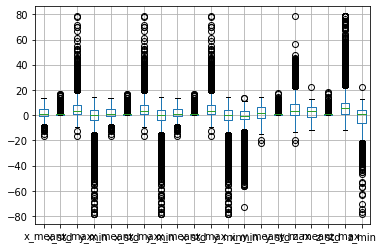

In [55]:
boxplot = df5.boxplot() ##Box plot of all features in a single plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


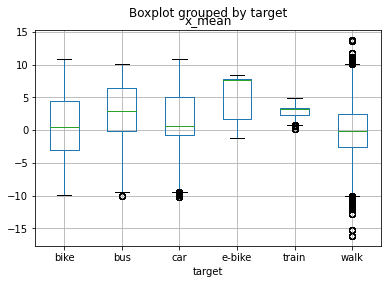

In [56]:
df5.boxplot(column = ['x_mean'], by = 'target') ## Box plot X_mean

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


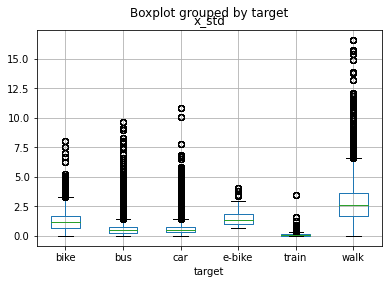

In [57]:
df5.boxplot(column = ['x_std'], by = 'target') ## box plot of X_std

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


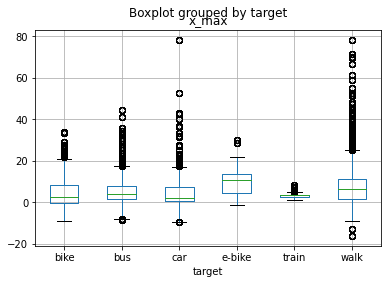

In [58]:
df5.boxplot(column = ['x_max'], by = 'target') ## Box plot of x_max

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


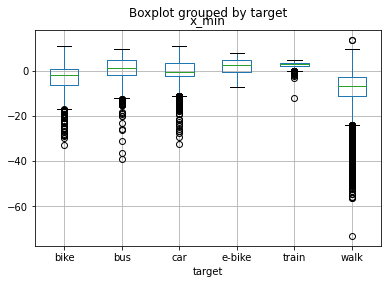

In [59]:
df5.boxplot(column = ['x_min'], by = 'target') ## Box plot of x_min

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


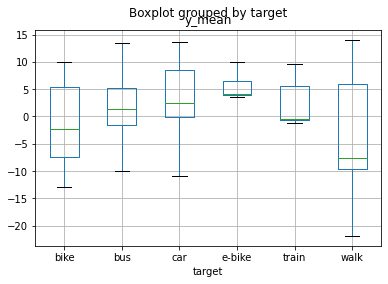

In [60]:
df5.boxplot(column = ['y_mean'], by = 'target') ## box plot of y_mean

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


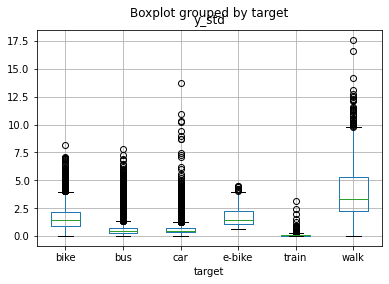

In [61]:
df5.boxplot(column = ['y_std'], by = 'target') ## box plot of y_std

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


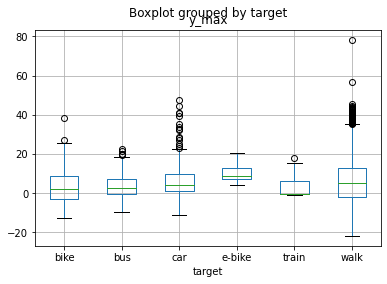

In [62]:
df5.boxplot(column = ['y_max'], by = 'target')  ## box plot of y_max

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


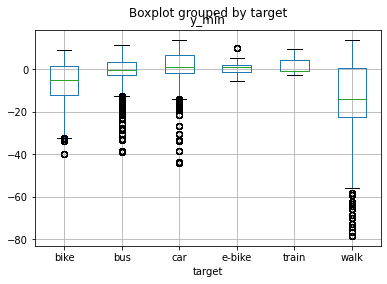

In [63]:
df5.boxplot(column = ['y_min'], by = 'target')  ## box plot of y_min

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


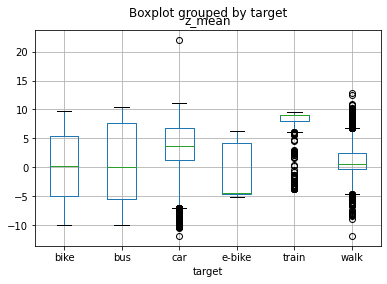

In [64]:
df5.boxplot(column = ['z_mean'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


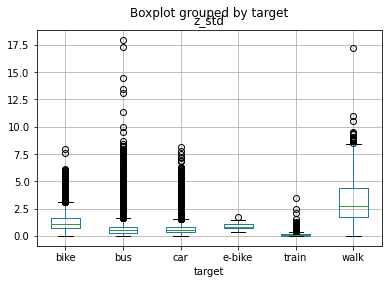

In [65]:
df5.boxplot(column = ['z_std'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


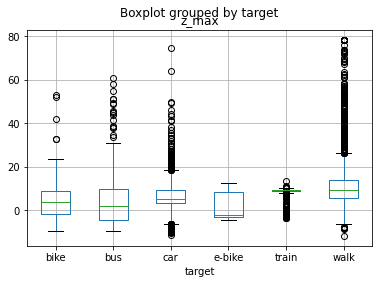

In [66]:
df5.boxplot(column = ['z_max'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


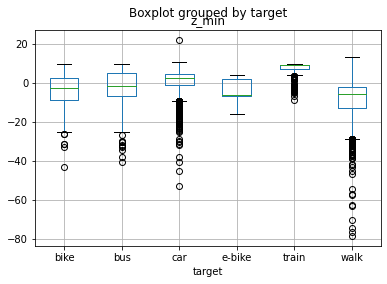

In [67]:
df5.boxplot(column = ['z_min'], by = 'target')

###Q5

Class=1, n=10661 (26.263%)
Class=2, n=20242 (49.866%)
Class=5, n=5847 (14.404%)
Class=0, n=3161 (7.787%)
Class=4, n=601 (1.481%)
Class=3, n=81 (0.200%)


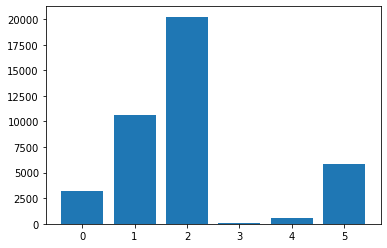

In [68]:
##import necessary libraries for creating balaced dataset

from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

## plotted unbalanced data set
data = df5.values #converted df5 into array data
X, y = data[:, :-1], data[:, -1] ## seoerated input and label data
y = LabelEncoder().fit_transform(y) #label encoded y
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [69]:
print(X)

[[0.8001408425854964 0.022135491967534483 0.8500000238418579 ...
  0.028708596946844855 -3.670000076293945 -3.809999942779541]
 [0.8099999984105428 0.01690307904956004 0.8299999833106995 ...
  0.02120195632779195 -3.700000047683716 -3.7799999713897705]
 [1.8504964527508891 0.5861500674686537 3.430000066757202 ...
  0.6460080789854357 -3.440000057220459 -6.400000095367432]
 ...
 [8.20833330684238 0.40935480963454557 9.5600004196167 ...
  0.5265630809384949 -3.190000057220459 -5.860000133514404]
 [8.051666577657064 0.2598472171780208 8.470000267028809 ...
  0.35185640569669885 -4.039999961853027 -5.389999866485596]
 [8.496555548244052 0.3263858447779168 9.4399995803833 ...
  0.6381178998676386 -2.5899999141693115 -5.599999904632568]]


In [70]:
print(y)

[1 1 1 ... 1 1 1]


In [71]:
type(X)

numpy.ndarray

In [72]:
df5.head()

,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
part_idx,,,,,,,,,,,,,,,,,,,,,
1->0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,bus
1->1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,bus
10->0,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,bus
10->1,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,bus
100->0,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,car


In [73]:
df5 = df5.reset_index()

In [74]:
df5.head()

,part_idx,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
0,1->0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,bus
1,1->1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,bus
2,10->0,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,bus
3,10->1,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,bus
4,100->0,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,car


In [75]:
df5 = df5.drop(['part_idx'],axis = 1) # dropped part_idx column from df5

In [76]:
df5.head()

,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,bus
1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,bus
2,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,bus
3,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,bus
4,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,car


In [77]:
df5 = df5.dropna() #dropped NaN values from dataframe df5

In [78]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40413 entries, 0 to 40592
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_mean  40413 non-null  float64
 1   x_std   40413 non-null  float64
 2   x_max   40413 non-null  float64
 3   y_min   40413 non-null  float64
 4   x_mean  40413 non-null  float64
 5   x_std   40413 non-null  float64
 6   x_max   40413 non-null  float64
 7   y_min   40413 non-null  float64
 8   x_mean  40413 non-null  float64
 9   x_std   40413 non-null  float64
 10  x_max   40413 non-null  float64
 11  y_min   40413 non-null  float64
 12  x_min   40413 non-null  float64
 13  y_mean  40413 non-null  float64
 14  y_std   40413 non-null  float64
 15  y_max   40413 non-null  float64
 16  z_mean  40413 non-null  float64
 17  z_std   40413 non-null  float64
 18  z_max   40413 non-null  float64
 19  z_min   40413 non-null  float64
 20  target  40413 non-null  object 
dtypes: float64(20), object(1)
memory us

Class=0, n=79 (16.667%)
Class=1, n=79 (16.667%)
Class=2, n=79 (16.667%)
Class=3, n=79 (16.667%)
Class=4, n=79 (16.667%)
Class=5, n=79 (16.667%)


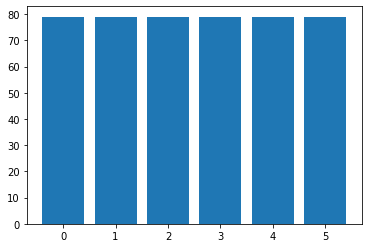

In [79]:
from imblearn.under_sampling import NearMiss #imported NearMiss to under sample the data
data = df5.values
X, y = data[:, :-1], data[:, -1]
y = LabelEncoder().fit_transform(y) #label encoded y
undersample = NearMiss() #ddefined under sampler
X, y = undersample.fit_resample(X, y) 
counter = Counter(y)
#printing no. of data per mode
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plotted balanced data
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [80]:
len(y)

474

###Q6

In [81]:
#train, test, validation split
#train 60%, test 20%, val 20%
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [82]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))


379
48
47


###Q7

In [83]:
#SVM classifier using using linear kernel 
from sklearn.svm import SVC  
model_svm = SVC(kernel='linear') 

#trained svm classifier
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [84]:
#calculated score for svm model using validation data
model_svm.score(X_valid, y_valid)

0.851063829787234

In [85]:
#made prediction using test data
y_pred=model_svm.predict(X_test)

In [86]:
#calculated f1 score for svm
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.8801169590643275

In [87]:
#created logistic regression model
from sklearn.linear_model import LogisticRegression
model_logi = LogisticRegression()
#trained logistic regression model
model_logi.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [88]:
#made prediction using X_test on logistic model
y_pred_logi = model_logi.predict(X_test)

In [89]:
#calculated f1 score for logistic model using y_test
f1_score(y_test, y_pred_logi, average='macro')

0.8423609457278188

In [90]:
#imported necessary packages for model
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [91]:
input_shape = [X_train.shape[1]]
#sequential MLP model 
model = tf.keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(12, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(9, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(6, activation = 'sigmoid'),
])

In [92]:
#compiled the mlp model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [93]:
# one hot encoding of labels
y1_train  = tf.keras.utils.to_categorical(y_train)
y1_test = tf.keras.utils.to_categorical(y_test)
y1_valid = tf.keras.utils.to_categorical(y_valid)

In [94]:
y1_train.shape

(379, 6)

In [95]:
y1_test.shape

(48, 6)

Epoch 1/200
24/24 [==============================] - 2s 13ms/step - loss: 2.5762 - accuracy: 0.1741 - val_loss: 2.4618 - val_accuracy: 0.1667
Epoch 2/200
24/24 [==============================] - 0s 5ms/step - loss: 2.2350 - accuracy: 0.2005 - val_loss: 2.1072 - val_accuracy: 0.1250
Epoch 3/200
24/24 [==============================] - 0s 5ms/step - loss: 1.9208 - accuracy: 0.2427 - val_loss: 1.8613 - val_accuracy: 0.1458
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 1.6189 - accuracy: 0.3087 - val_loss: 1.6603 - val_accuracy: 0.2083
Epoch 5/200
24/24 [==============================] - 0s 5ms/step - loss: 1.4330 - accuracy: 0.4485 - val_loss: 1.4992 - val_accuracy: 0.3542
Epoch 6/200
24/24 [==============================] - 0s 5ms/step - loss: 1.3329 - accuracy: 0.4934 - val_loss: 1.3570 - val_accuracy: 0.4792
Epoch 7/200
24/24 [==============================] - 0s 5ms/step - loss: 1.2254 - accuracy: 0.5567 - val_loss: 1.2169 - val_accuracy: 0.6042
Epoch 8/200


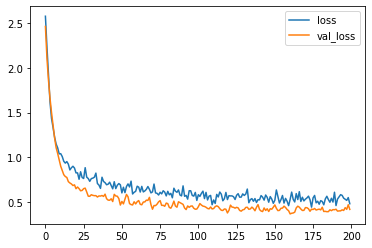

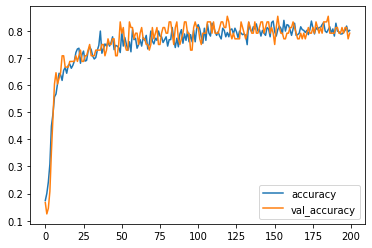

In [96]:
#training model
epochs = 200
history = model.fit(X_train, y1_train, batch_size=16,
                    epochs=epochs, verbose=1,
                    validation_data=(X_test, y1_test)
)
# plotting training history
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [97]:
#made predictions on x_test
y_pred_ann = model.predict(X_test)